This code adds padding to the saved png image to make it to the
specified size 720x720 that Prashanth specified.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL

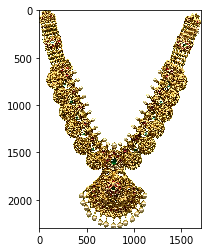

In [24]:
image=Image.open("upload.png")
plt.imshow(image)

In [25]:
fixed_width = 454
width_percent = (fixed_width / float(image.size[0]))
height_size = int((float(image.size[1]) * float(width_percent)))
image = image.resize((fixed_width, height_size), PIL.Image.NEAREST)
width, height = image.size
print(width,height)

454 610


In [28]:
if height>675:
    size=675,675
    image.thumbnail(size, Image.ANTIALIAS)

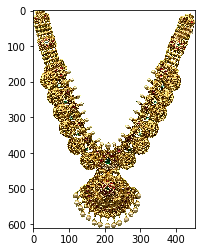

In [29]:
plt.imshow(image)

In [30]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

(720, 720)


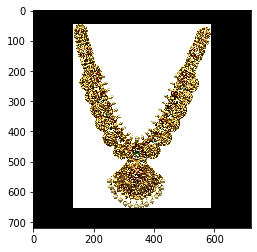

In [35]:
width, height = image.size
top = 45
left = right = (720-width)//2
bottom  = 720 - top - height
#print(width,height,bottom)
im_new = add_margin(image, top, right, bottom, left, (0, 0, 0))
plt.imshow(im_new)
print(im_new.size)

In [40]:
#im_new.save("uv_mapped_size.png")

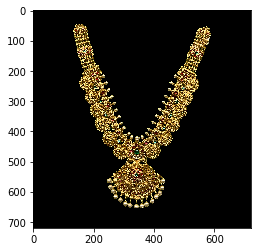

In [43]:
#convert into png image
file_name = "uv_mapped_size.png"

src = cv2.imread(file_name, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [44]:
cv2.imwrite("final720.png",dst)

True